In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
advertising = pd.DataFrame(pd.read_csv("C:/Users/admn/Downloads/advertising1.csv"))

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,NaN,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           198 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,200.000000,200.000000,200.000000
mean,148.396970,23.264000,29.984500,15.130500
std,85.212725,14.846809,20.820361,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,75.150000,9.975000,12.550000,11.000000
50%,150.650000,22.900000,25.600000,16.000000
75%,219.475000,36.525000,44.500000,19.050000
max,296.400000,49.600000,89.600000,27.000000


In [7]:
advertising.isnull().sum()*100/advertising.shape[0]

TV           1.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [8]:
#advertising.dropna()

In [9]:
advertising['TV'] = advertising['TV'].fillna(0)

In [ ]:
advertising.head()

In [11]:
import seaborn as sns

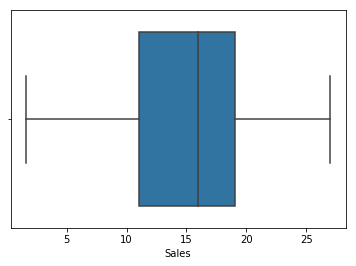

In [12]:
sns.boxplot(advertising['Sales'])

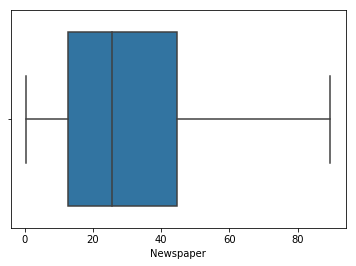

In [13]:
sns.boxplot(advertising['Newspaper'])

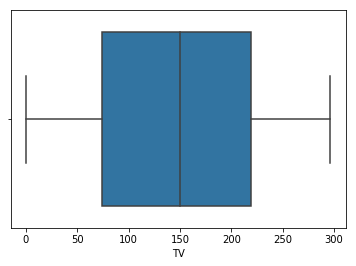

In [14]:
sns.boxplot(advertising['TV'])

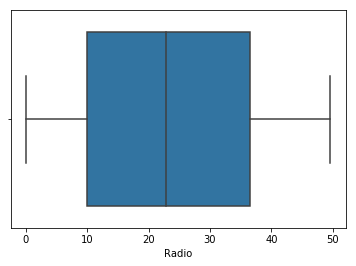

In [15]:
sns.boxplot(advertising['Radio'])

In [16]:
#Removing Outliers
#q1 = advertising.quantile(0.1)
#q3 = advertising.quantile(0.95)
#IQR = q3 - q1
#print(IQR)

In [17]:
#ad = advertising[~((advertising < (q1 - 1.5 * IQR)) |(advertising > (q3 + 1.5 * IQR))).any(axis=1)]
#ad.shape

In [18]:
#sns.boxplot(advertising['Newspaper'])

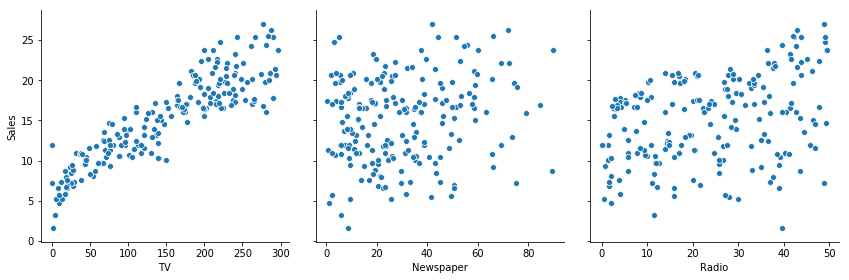

In [19]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height= 4, kind = 'scatter')

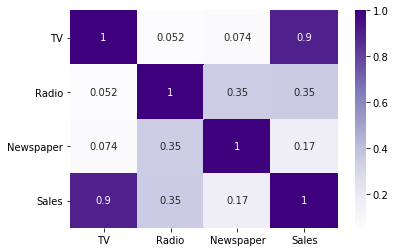

In [20]:
sns.heatmap(advertising.corr(), cmap='Purples', annot=True)

In [51]:
#Model Building
X = advertising.drop(['Newspaper','Radio','Sales'], axis = 1)
#X = advertising['TV'].values
#X = X.reshape(-1, 1)
#X = X.transpose()
y = advertising['Sales']
#y = y.reshape(-1, 1)
#y = y.transpose()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0) 

In [54]:
X_train.shape

(134, 1)

In [55]:
X_test.shape

(66, 1)

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [57]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
accuracy = lr.score(X_test, y_test)

In [59]:
accuracy*100

80.76901987777076

In [60]:
lr.coef_

array([0.05515743])

In [61]:
lr.intercept_

7.145408746563374

In [62]:
b = lr.predict([[151.5]])

In [65]:
b

array([15.50175928])